In [133]:
import pandas as pd
import glob
import json


In [155]:


# get data file names

figure_meta = {
    #'key_path': 'log_dir_thesis/csvs/testreward', # updateloss, testreward, LR, avg_cost, updatelossactor, evalrew
    'key_paths': ['log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/avg_cost'],
    #'y_df_label': 'rew', # test/reward, LR, avg_cost, update/loss/critic2
    'y_df_labels': ['test/reward', 'test/reward', 'test/reward', 'test/reward', 'test/reward', 'avg_cost'],
    'invert_y': [True, True, True, True, True, False],
    'x_df_label': 'Steps',
    #'x_multiplier': 2560,
    'y_display_label': 'average solution length',
    'x_display_label': 'number of samples trained', # number of samples trained, problem size
    'run_names': ["run_129__20220501T214922", "run_126__20220429T203838", "run_167__20220501T094242", "run_127__20220501T213709", "run_128__20220429T203856", "run_k35__20220502T172652"],
    'line_names': ["DQN", "PG", "SAC", "A2C", "PPO", "Kool et al."],
    'plot_filename': 'tsp_final_trainings_zoom_asdjlaksdjal',
    'legend_title': 'Algorithm',
    'is_reward_plot': False,
    'y_type': 'linear'
}


#with open('figure_metas/tsp_final_trainings.json') as json_file: #_loss
#    figure_meta = json.load(json_file)


#figure_meta['plot_filename'] = 'tsp_final_trainings_zoom'
#figure_meta['run_names'] = ['run_129__20220501T214922', 'run_126__20220429T203838', 'run_167__20220501T094242', 'run_127__20220501T213709', 'run_128__20220429T203856', 'run_k37__20220503T151519', 'run_k35__20220502T172652']


#figure_meta['line_names'] = ['DQN', 'PG', 'SAC', 'A2C', 'PPO', 'PG Kool no baseline', 'PG Kool with baseline']
#figure_meta['invert_y'] = [True, True, True, True, True, False, False]

#figure_meta['key_paths'] = ['log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/testreward', 'log_dir_thesis/csvs/avg_cost', 'log_dir_thesis/csvs/avg_cost']
#figure_meta['y_df_labels'] = ['test/reward', 'test/reward', 'test/reward', 'test/reward', 'test/reward', 'avg_cost', 'avg_cost']
#figure_meta['is_reward_plot'] = True

#figure_meta['run_names'] = ['run_000__20220408T230926_20220428T010610', 'run_001__20220409T002803_20220428T022531', 'run_002__20220409T014651_20220428T034418', 'run_003__20220409T030406_20220428T050142']

#del figure_meta['x_multiplier']

#figure_meta['is_reward_plot'] = False
#figure_meta['invert_y'] = True
#figure_meta['y_type'] = 'log'
#figure_meta['y_display_label'] = 'loss'

#figure_meta['key_path'] = 'log_dir_thesis/csvs/testreward'
#figure_meta['y_df_label'] = 'test/reward'
#figure_meta['plot_filename'] = 'pg_fixed_lr'

#figure_meta['y_df_label'] = 'update/loss'
#figure_meta['x_multiplier'] = 2560 # 64 envs * 20 steps * 2 episodes per collect
#figure_meta['plot_filename'] = 'pg_fixed_lr_loss' # pg_fixed_lr_loss


filenames = figure_meta['run_names']
x_df_label = figure_meta['x_df_label']
y_display_label = figure_meta['y_display_label']
x_display_label = figure_meta['x_display_label']
plot_names = figure_meta['line_names']
x_mult = figure_meta['x_multiplier'] if 'x_multiplier' in figure_meta.keys() else 1
is_reward_plot = figure_meta['is_reward_plot']
invert_y = figure_meta['invert_y']
y_type = figure_meta['y_type']

plot_dfs = []
filepaths = []
if 'key_paths' in figure_meta.keys() and len(figure_meta['key_paths']) > 0:
    assert(len(figure_meta['key_paths']) == len(filenames))
    y_df_labels = figure_meta['y_df_labels']
    for path_str, filename in zip(figure_meta['key_paths'], filenames):
        filepaths.append(path_str + "/" + filename + ".csv")
else:
    path = figure_meta['key_path']
    filepaths = [path + "/" + filename + ".csv" for filename in filenames]
    if not isinstance(invert_y, list):
        invert_y = [invert_y] * len(filepaths)
    y_df_labels = [figure_meta['y_df_label']] * len(filepaths)
    
for i, filepath in enumerate(filepaths):
    df = pd.read_csv(filepath, sep=';')
    if invert_y[i]:
        df[y_df_labels[i]] = -df[y_df_labels[i]]
    plot_dfs.append(df)

In [156]:
import plotly.io as pio
import plotly.express as px

# naming a layout theme for future reference
pio.templates["google"] = go.layout.Template(
    layout_colorway=['#FD3216','#00FE35','#00B5F6','#EEA6FB','#0DF9FF','#FF9616','#1CBE4F','#EEA6FB'] #Light24 #['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#185ABC', '#B31412', '#EA8600', '#137333', '#d2e3fc', '#ceead6']
) # 1CBE4F

# setting Google color palette as default
pio.templates.default = "google"

In [159]:
# https://plotly.com/python/plot-data-from-csv/
# https://stackoverflow.com/questions/64500472/plot-multiple-pandas-dataframes-in-one-graph-python-plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.kaleido.scope.mathjax = None # https://github.com/plotly/plotly.py/issues/3469

fig = go.Figure()
for i, (name, df) in enumerate(zip(plot_names, plot_dfs)):
    if "Kool" in name:
        fig = fig.add_trace(go.Scatter(x = df[x_df_label][::40] * x_mult,
                                   y = df[y_df_labels[i]][::40], 
                                   name = name,
                                   line=dict(width=3))) # , marker=dict(size=10)
    else:
        fig = fig.add_trace(go.Scatter(x = df[x_df_label][::1] * x_mult,
                                   y = df[y_df_labels[i]][::1], 
                                   name = name,
                                   line=dict(width=3)))

fig.update_layout(
    font_family="libertine",
    font_size=28,
    autosize=False,
    width=2000,
    height=800,
    margin=dict(
        l=100,
        r=70,
        b=80,
        t=30,
        pad=4
    ),
    yaxis=dict(
        title_text=y_display_label,
        type="linear" if is_reward_plot else y_type,
        range=(3.0, 10.8) if is_reward_plot else None, # 10.8
        rangemode="tozero",
        #tickformat='.0e',
        
        #ticktext=["-0.1", "-1", "-10", "-100", "-1000", "-10k", "-100k", "-1M", "-10M"],
        #tickvals=[0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
        #tickmode="array",
        #titlefont=dict(size=30),
    ),
    xaxis=dict(
        title_text=x_display_label,
        range=None if is_reward_plot else (0, x_mult*df[x_df_label].iloc[-1]),
        rangemode="tozero",
        #ticktext=["Very long label", "long label", "3", "label"],
        #tickvals=[1, 2, 3, 4],
        #tickmode="array",
        #titlefont=dict(size=30),
    ),
    title=dict(
        #text=title,
    ),
    legend=dict(
        yanchor="top",
        y=0.84, # 84   6
        xanchor="right",
        x=0.99, #0.99,
        bgcolor='rgba(255,255,255,0.8)'
    ),
    legend_title_text=figure_meta['legend_title'],
    #paper_bgcolor="LightSteelBlue",
)
# https://plotly.com/python/horizontal-vertical-shapes/
if is_reward_plot:
    fig.add_hline(y=10.43, line_dash="dot", annotation_text="random", annotation_position="bottom right")
    fig.add_hline(y=3.84, line_dash="dot", annotation_text="optimal", annotation_position="bottom right")

#fig.add_hline(y=3.84, line_dash="dot", annotation_text="optimal (20)", annotation_position="bottom right")
#fig.add_hline(y=5.70, line_dash="dot", annotation_text="optimal (50)", annotation_position="bottom right")
#fig.add_hline(y=7.76, line_dash="dot", annotation_text="optimal (100)", annotation_position="bottom right")

fig.show()
fig.write_image("figures/" + figure_meta['plot_filename'] + ".pdf")

with open("figure_metas/" + figure_meta['plot_filename'] + ".json", "w") as fp:
    json.dump(figure_meta,fp)
    

NameError: name 'df1' is not defined

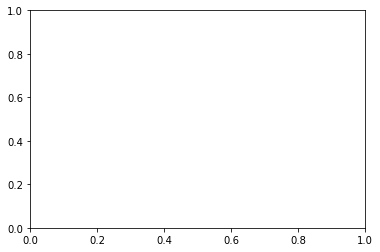

In [129]:
import matplotlib.pyplot as plt
import numpy as np
x_name = 'Steps'
y_name = 'test/reward'
fig, ax = plt.subplots()
plt.plot(df1[x_name], df1[y_name])
plt.plot(df2[x_name], df2[y_name])
plt.plot(df3[x_name], df3[y_name])

ax.set(xlabel='Env Steps', ylabel='Avg Score')
#ax.set_ylim(ymin=0)
ax.grid()

fig.set_size_inches(16, 9)
#fig.savefig("test.png")
plt.show()

In [ ]:
# !pip install -U kaleido